# 🏢 **Financial Distress Prediction**

### *Bankruptcy Prediction using Machine Learning*

In this notebook, I (👨🏻‍💼) use the dataset [Financial Distress](https://www.kaggle.com/datasets/shebrahimi/financial-distress?select=Financial+Distress.csv), available on [Kaggle](https://www.kaggle.com/), to evaluate the performance of different Machine Learning models in predicting financial distress. More specifficaly, I will be exploring the following topics on Data Science and Machine Learning:

🧹 Data Cleaning and Preprocessing
- Checking for missing values
- Checking for duplicates
- ⛏️ Feature selection
- ⚖️ Techniques to deal with **imbalanced data** (Undersampling & Oversampling)

📈 Exploratory Data Analysis (EDA)

🤖 Machine Learning (both **Frequentist** and **Bayesian** approaches)
- Logistic Regression
- Random Forest
  
For this part, the model selection and hyperparameter tuning will be done using $k$-fold cross-validation and grid search.

📋 Model evaluation and comparison
  - Confusion Matrix
  - Accuracy
  - Recall
  - Precision
  - ROC Curve

It goes without saying that the **topics listed above are not necessairly to be explored in a linear order**. On the contrary: I will most probably need to go back and forth between them, as I see fit. This is pretty common in Data Science projects, as we are always learning new stuff and improving our models.

Along the notebook, I will be explaining the concepts and techniques used, as well as the results obtained.

Naturaly, I will be using Python and some of its libraries, such as [pandas](https://pandas.pydata.org/), [NumPy](https://numpy.org/), [matplotlib](https://matplotlib.org/) and [scikit-learn](https://scikit-learn.org/stable/). On the Bayesian side, I will be implementing the models using NumPy and statistical knowledge on Bayesian inference and classification models. 

Without further ado, let's get started!

## 💰 **Understanding the Subject**
### ***Why is it important to understand the subject?***

**Our starting point should be the data**. The "Financial Distress" dataset contains a lot of information about companies. This is pretty important for Machine Learning as the more data we have the better. The quantity of data is important because it allows the models to learn more about the problem and, consequently, to generalize better. Besides, the more data we have, the more confident we can be about the results obtained - that is, the model tends to have its precision improved and its variance reduced. 

❗**BUT WE NEED TO BE CAREFUL:** more data does not always mean better results. For instance, if the data was not collected properly, its quality may be compromised and the model may not be able to learn anything from it. In this case, the model will not be able to generalize well and its performance will be poor. 

Another example is when you train a model with a lot of features, but most of them are not relevant to the problem. This will probabibly lead to poor results as well. It happens because one is adding noise to the model and increasing its complexity, which may lead to overfitting [1]. **This is one of the many reasons why we should always try to understand the data before training any model.**

[1]: We see overfitting when the model learns the train data very well, but is not able to generalize. That it, it has fitted too well to the train data and is not able to learn the underlying patterns of the problem. It might be a little bit clearer now why adding irrelevant features to the model may lead to overfitting.

![overfitting-underfitting](https://miro.medium.com/v2/resize:fit:720/format:webp/1*_7OPgojau8hkiPUiHoGK_w.png)

### ***Getting to know the data***

Keeping that in mind, let me explain what each column of our dataset means:

According to the documentation, the rows represent some measurements of companies across time. 

- The first column, `Company`, is the identifier of the company. 
  
- The second column, `Time`, is the identifier of the time when the measurements were taken. The third column, `Financial Distress`, is the target variable. It is a continuous variable which we aim to binarize: "*[...] if it is greater than -0.50 the company should be considered as healthy (0). Otherwise, it would be regarded as financially distressed (1).*".

- The other columns are the features, which are measurements of the companies that will be used to predict the target variable. By the time we perform the Exploratory Data Analysis (EDA), we will have a better understanding of what each feature means and its importance to the problem.

**This is very important data for companies! If you are part of a Data Analysis team in a company, being able to use this data and predict an eventual financial distress can be a game changer. It can help the decision-makers to take the right decisions at the right time, avoiding a lot of problems in the future.**

## 📚 **Importing the libraries**

WRITE SOMETHING ABOUT THE LIBRARIES IMPORTED........

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

## 🧹 **Data Cleaning and Preprocessing**

In [2]:
df = pd.read_csv("../data/data.csv")

In [3]:
df.head()

,Company,Time,Financial Distress,x1,x2,x3,x4,x5,x6,x7,...,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83
0,1,1,0.010636,1.2810,0.022934,0.87454,1.21640,0.060940,0.188270,0.52510,...,85.437,27.07,26.102,16.000,16.0,0.2,22,0.060390,30,49
1,1,2,-0.455970,1.2700,0.006454,0.82067,1.00490,-0.014080,0.181040,0.62288,...,107.090,31.31,30.194,17.000,16.0,0.4,22,0.010636,31,50
2,1,3,-0.325390,1.0529,-0.059379,0.92242,0.72926,0.020476,0.044865,0.43292,...,120.870,36.07,35.273,17.000,15.0,-0.2,22,-0.455970,32,51
3,1,4,-0.566570,1.1131,-0.015229,0.85888,0.80974,0.076037,0.091033,0.67546,...,54.806,39.80,38.377,17.167,16.0,5.6,22,-0.325390,33,52
4,2,1,1.357300,1.0623,0.107020,0.81460,0.83593,0.199960,0.047800,0.74200,...,85.437,27.07,26.102,16.000,16.0,0.2,29,1.251000,7,27


In [4]:
df.describe()

,Company,Time,Financial Distress,x1,x2,x3,x4,x5,x6,x7,...,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83
count,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3.672000e+03,3672.000000,3672.000000,3672.000000,...,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000
mean,182.084423,7.528322,1.040257,1.387820,0.129706,0.615769,8.681599e-01,0.154949,0.106717,0.784031,...,86.839822,91.920506,89.115908,17.780855,15.198708,-2.664305,19.714597,1.100488,13.122277,33.044935
std,117.024636,4.064016,2.652227,1.452926,0.120013,0.177904,5.719519e-01,0.124904,0.210555,1.033606,...,16.706209,64.656504,64.349382,2.040152,2.828648,8.192663,7.508588,2.666733,9.465907,13.714563
min,1.000000,1.000000,-8.631700,0.075170,-0.258080,0.016135,5.350000e-07,-0.269790,-0.627750,0.035160,...,54.806000,24.318000,23.776000,15.250000,12.000000,-20.200000,1.000000,-0.499220,1.000000,2.000000
25%,80.000000,4.000000,0.172275,0.952145,0.048701,0.501888,5.525575e-01,0.070001,-0.027754,0.436003,...,79.951000,39.800000,38.377000,16.000000,13.000000,-7.000000,14.000000,0.189912,6.000000,21.000000
50%,168.000000,7.000000,0.583805,1.183600,0.107530,0.638690,7.752450e-01,0.131830,0.104325,0.641875,...,90.000000,66.120000,59.471000,17.000000,14.500000,0.200000,20.000000,0.594765,11.000000,34.000000
75%,264.250000,11.000000,1.351750,1.506475,0.188685,0.749425,1.039000e+00,0.219570,0.231230,0.896772,...,93.883000,130.500000,132.400000,20.000000,16.000000,2.100000,26.000000,1.355050,17.000000,44.000000
max,422.000000,14.000000,128.400000,51.954000,0.749410,0.967900,6.835600e+00,0.858540,0.929550,38.836000,...,120.870000,227.500000,214.500000,22.000000,22.000000,8.600000,37.000000,128.400000,49.000000,74.000000


We must check if there are null values or duplicated rows.

In [5]:
print(f"Columns with NaN values: {df.columns[df.isna().any()].to_list()}")

Columns with NaN values: []


In [6]:
print(f"# of duplicated rows: {df.duplicated().sum()}")

# of duplicated rows: 0


Given that there is no NaN values or duplicated rows, we can proceed to the next step. Remember that the column `Financial Distress` is a continuous variable, but we would like to model it as a binary variable. The rule has already been given: if it is smaller than -0.5, then it is financially distressed. Otherwise, it is not. We can use the `apply` method to do this.

In [7]:
def isDistressed(x):
    """
    Returns 1 if x is less than -0.5, 0 otherwise. 
    1 means Financially Distressed, 0 means Financially Healthy.
    """
    if x < -0.5:
        return 1
    elif x >= -0.5:
        return 0

In [8]:
df["target"] = df["Financial Distress"].apply(isDistressed)

In [9]:
df[["Company", "Time", "Financial Distress", "target"]].head()

,Company,Time,Financial Distress,target
0,1,1,0.010636,0
1,1,2,-0.455970,0
2,1,3,-0.325390,0
3,1,4,-0.566570,1
4,2,1,1.357300,0


Now that the dataset is cleaned, we can start to analyze it. Let's plot some visualizations to help us explore the data and see if there is anything else we need to clean or adjust.

## 📈 **Exploratory Data Analysis (EDA)**

We already know that there are many feature columns in our dataset. Plotting them all at once would be a mess. This is a good oportunity for us to implement some fundamentals of feature selection, which is a very common way of avoiding multicollinearity and overfitting. We have already explained the concept of overfittig, so let's talk about multicollinearity.

**MULTICOLLINEARITY** is the phenomenon in which two or more independant variables are highly correlated, and therefore, one of them can be predicted from the others. For example, when proceeding with social researches, it is common to find that the income of a person is highly correlated with the education level. In this case, we can say that the education level is a multicollinear variable, and it should be removed from the model. 

### ⛏️ **Applying Feature Selection...**

In other words, our goal is to **find the best set of features that builds the best model to predict the target variable**.

To define the best set of features, we need a score function to tell us which are the best ones. In this case, we will use the **Fisher Score**, which is a very intuitive score function that evaluates the worth of a feature based on the correlation between the feature and the target variable. It is calculated as follows:

$$F=\frac{\text{variance between groups}}{\text{variance within groups}}$$

It is never too much to emphasize that multicollinearity is not a binary thing. The methods developed to deal with it are supposed to reduce it, but they will never completely eliminate it. Also, we apply them under the risk of loosing important variables that could be useful for our model. 

In [10]:
# split data into features and target
X = df.drop(columns=["target"])
y = df["target"]

# apply SelectKBest class to extract top 10 best features
bestFeatures = SelectKBest(score_func=f_classif, k=10)
fit = bestFeatures.fit(X, y)

# get scores of features
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

# concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ["Specs", "Score"]

# print 10 best features
featureScores = pd.DataFrame(featureScores.nlargest(10, "Score"))
featureScores

,Specs,Score
16,x14,340.503691
51,x49,305.654982
11,x9,286.864508
4,x2,228.466647
12,x10,213.992058
7,x5,203.646987
5,x3,164.458502
15,x13,164.457905
57,x55,140.955761
55,x53,138.475969


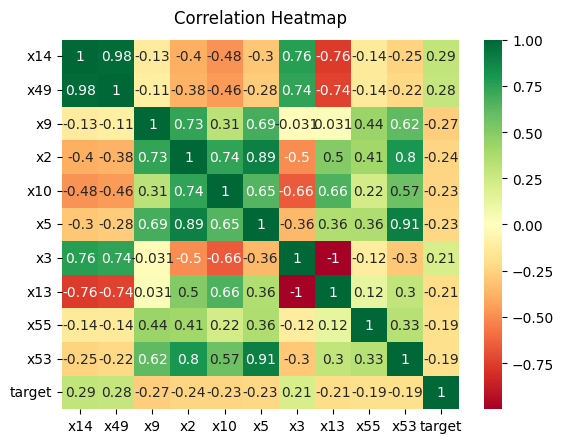

In [11]:
# gets the list of important features and plots a heatmap of the correlation between them
importantFeatures = featureScores["Specs"].tolist()
importantFeatures.append("target")

# get the correlation between the features and the target
corr = df[importantFeatures].corr()

# plot the heatmap
heatmap = sns.heatmap(corr, annot=True, cmap="RdYlGn")
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)
plt.show()

There are still some variables which seem to be highly correlated, but as we have already discussed, multicollinearity can only be dealt with at some extent. Let us just explore a little bit more the distribution of the variables.

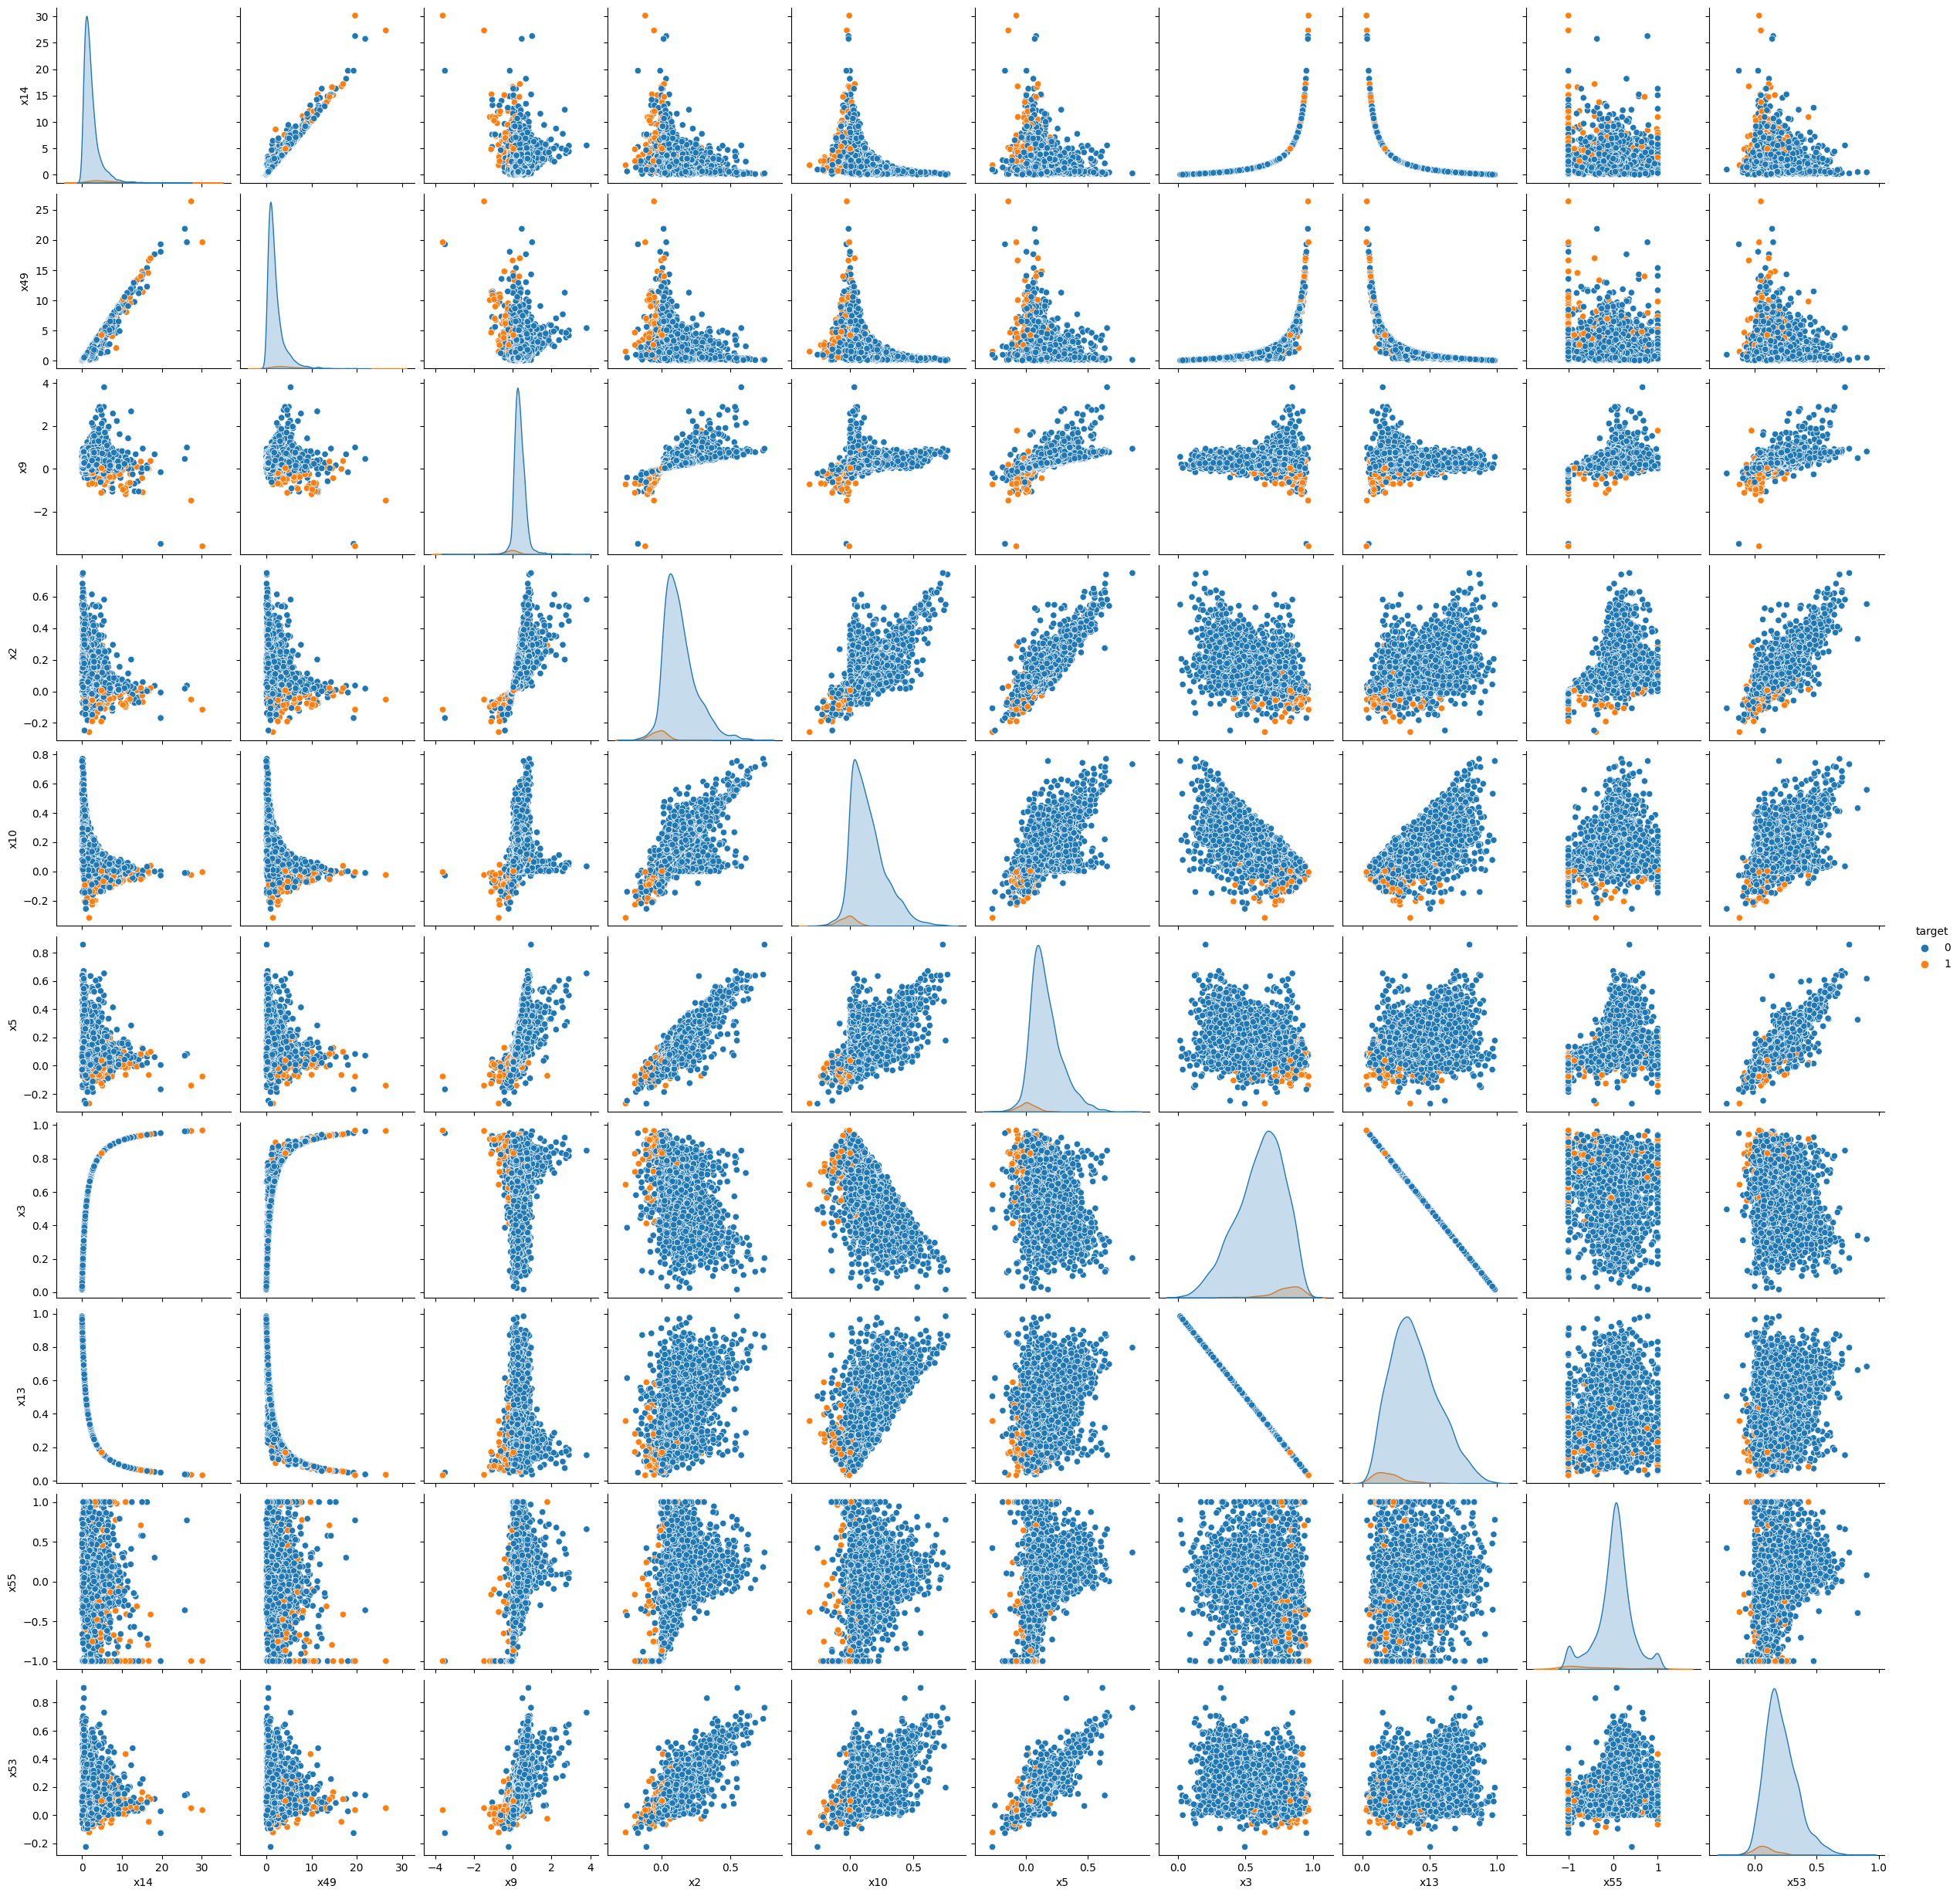

In [12]:
sns.pairplot(df[importantFeatures], hue='target')
plt.show()

Wait... how many ocurrencies of a company under financial distress there are in the dataset?

In [13]:
df["target"].value_counts()

target
0    3536
1     136
Name: count, dtype: int64

In [14]:
df["target"].value_counts(normalize=True)

target
0    0.962963
1    0.037037
Name: proportion, dtype: float64

As we can see, there are only a few cases of companies under financial distress: it corresponds to 3.7% of our data! Using technical terms, we would say that our dataset is *inbalanced*. There are several ways to deal with this issue, and the classical ones are **OVERSAMPLING** and **UNDERSAMPLING**. Oversampling consists in increasing the number of samples of the minority class, while undersampling consists in decreasing the number of samples of the majority class. 

![ADD IMAGE ABOUT OVERSAMPLING AND UNDERSAMPLING](https://miro.medium.com/v2/resize:fit:1400/1*P93SeDGPGw0MhwvCcvVcXA.png)

❗**REMEMBER**: before applying resampling techniques, we need to split our dataset into training, test (and validation for hyperparameter tuning) sets. **As the test set is supposed to be a good representation of the real world**, we should not apply any transformation on it.

In [17]:
# randomize the dataset
df = df.sample(frac=1).reset_index(drop=True)

X = df[importantFeatures].drop(columns=["target"])
y = df["target"]

# get train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# get validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [18]:
print(f'Average class probability in training set:   {y_train.mean():.4f}')
print(f'Average class probability in test set:       {y_test.mean():.4f}')
print(f'Average class probability in validation set: {y_val.mean():.4f}')

Average class probability in training set:   0.0379
Average class probability in test set:       0.0354
Average class probability in validation set: 0.0357


Given that we have very few observations for the `target == 1`, those are reasonable results. Now, let's apply resampling techniques.

### ⚖️ **Applying Resampling...**

#### **Undersampling**

#### **Oversampling**

## 🤖 **Machine Learning** + 📋 **Model evaluation and comparison**

### **Frequentis approach**

WRITE SOMETHING ABOUT FREQUENTIST APPROACHES IN GENERAL

### **Bayesian approach**

WRITE SOMETHING ABOUT BAYESIAN APPROACHES IN GENERAL

## **References**

https://arxiv.org/pdf/1502.02312.pdf

https://arxiv.org/pdf/1202.3725.pdf

https://ranasinghiitkgp.medium.com/implementing-feature-selection-methods-for-machine-learning-bfa2e4b4e02

https://towardsdatascience.com/why-having-many-features-can-hinder-your-models-performance-865369b6b8b1

https://towardsdatascience.com/introduction-to-bayesian-logistic-regression-7e39a0bae691

https://stackoverflow.com/questions/31948879/using-explicit-predefined-validation-set-for-grid-search-with-sklearn

https://www.kaggle.com/datasets/shebrahimi/financial-distress?select=Financial+Distress.csv

https://en.wikipedia.org/wiki/Multicollinearity

https://towardsdatascience.com/multi-collinearity-in-regression-fe7a2c1467ea

https://www.tensorflow.org/tutorials/structured_data/imbalanced_data#train_on_the_oversampled_data